<a href="https://colab.research.google.com/github/Vitor-costa-diniz/Atividade-Avaliativa-02/blob/main/Clusteriza%C3%A7%C3%A3o_de_Vinhos_com_PCA_e_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Carregando e preparando dados

In [2]:
wine_data = load_wine()
X = wine_data.data
y_true = wine_data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dimensões originais dos dados: {X.shape}")

Dimensões originais dos dados: (178, 13)


# Reduzindo a dimensionalidade com PCA

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

variancia_explicada = sum(pca.explained_variance_ratio_) * 100
print(f"Dimensões dos dados após PCA: {X_pca.shape}")
print(f"Variância total explicada pelos 2 componentes: {variancia_explicada:.2f}%")

Dimensões dos dados após PCA: (178, 2)
Variância total explicada pelos 2 componentes: 55.41%


# Aplicação do K-means para clusterização

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)

# VISUALIZAÇÃO DOS RESULTADOS

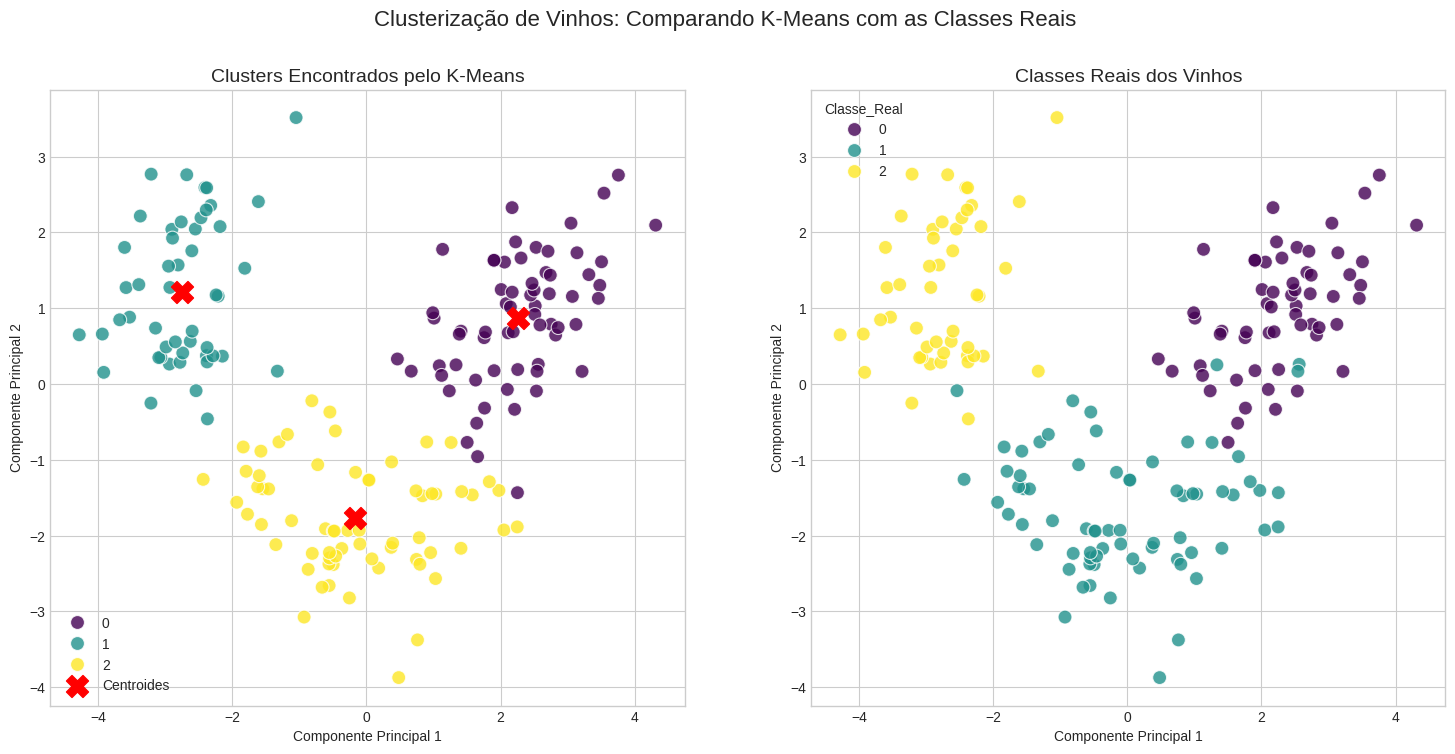

In [5]:
pca_df = pd.DataFrame(
    data=X_pca,
    columns=['Componente Principal 1', 'Componente Principal 2']
)
pca_df['Cluster_KMeans'] = y_kmeans
pca_df['Classe_Real'] = y_true

plt.style.use('seaborn-v0_8-whitegrid')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Clusterização de Vinhos: Comparando K-Means com as Classes Reais', fontsize=16)

sns.scatterplot(
    x='Componente Principal 1',
    y='Componente Principal 2',
    hue='Cluster_KMeans',
    data=pca_df,
    palette='viridis',
    s=100,
    alpha=0.8,
    ax=ax1
)
ax1.set_title('Clusters Encontrados pelo K-Means', fontsize=14)
centers = kmeans.cluster_centers_
ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X', label='Centroides')
ax1.legend()

sns.scatterplot(
    x='Componente Principal 1',
    y='Componente Principal 2',
    hue='Classe_Real',
    data=pca_df,
    palette='viridis',
    s=100,
    alpha=0.8,
    ax=ax2
)
ax2.set_title('Classes Reais dos Vinhos', fontsize=14)

plt.show()